# Natural Evolution Strategies (NES) toy example that climbs a hill in 2D

A bare bones example of optimizing finding the local minima of an example
2D function using Natural Evolution Strategies (NES), where gradient is estimated
as the average of the jittered points around current location, weighted by how
much the function increases for each direction.

Adapted from: https://gist.github.com/karpathy/77fbb6a8dac5395f1b73e7a89300318d
Originally linked from https://blog.openai.com/evolution-strategies/

In [286]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# plt.rcParams['image.cmap'] = 'gray'
# plt.rcParams['image.interpolation'] = 'nearest'
# %matplotlib inline

In [287]:
import os
import sys
import json
import time
import numpy as np
from random import shuffle

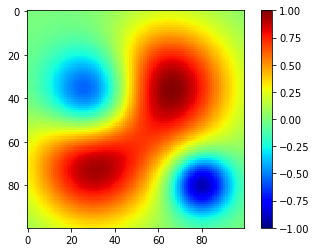

In [288]:
# generate a toy 2D regression dataset
sz = 100
X, Y = np.meshgrid(np.linspace(-1, 1, sz), np.linspace(-1, 1, sz))

mux, muy, sigma = 0.3, -0.3, 0.4
G1 = np.exp(-((X-mux)**2 + (Y-muy)**2)/(2.0*sigma**2))
mux, muy, sigma = -0.4, 0.4, 0.4
G2 = np.exp(-((X-mux)**2 + (Y-muy)**2)/(2.0*sigma**2))
mux, muy, sigma = 0.6, 0.6, 0.2
G3 = np.exp(-((X-mux)**2 + (Y-muy)**2)/(2.0*sigma**2))
mux, muy, sigma = -0.4, -0.2, 0.3
G4 = np.exp(-((X-mux)**2 + (Y-muy)**2)/(2.0*sigma**2))

# G = G4
G = G1 + G2 - G3 - G4
fig, ax = plt.subplots()
im = ax.imshow(G, vmin=-1, vmax=1, cmap='jet')
plt.colorbar(im, ax=ax)

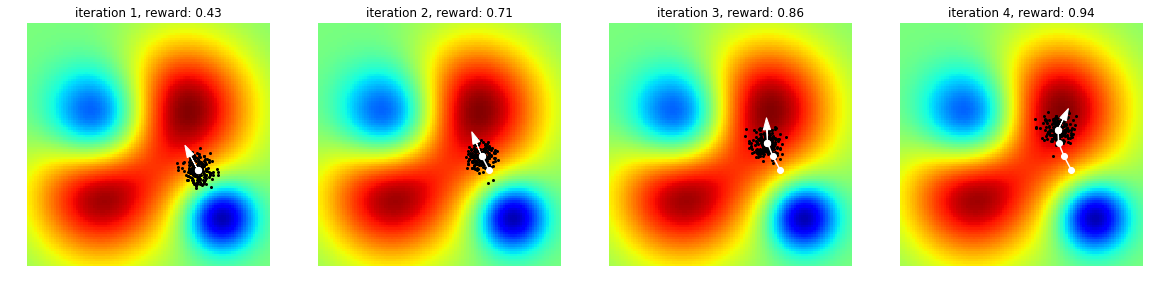

In [289]:
np.random.seed(3)
nn = 4 # number of steps to make (and plot horizontally)
alpha = 0.03 # learning rate
sigma = 3 # standard deviation of the samples arond currnt parameter vector

w = np.array([70.0, 60.0]) # start point
plt.figure(figsize=(20,5))

prevx, prevy, = [], []
for q in range(nn):

    # draw the optimization landscape
    ax1 = plt.subplot(1, nn, q+1) # multiple subplots of 1 row, nn colomns, draw subplot q+1
    plt.imshow(G, vmin=-1, vmax=1, cmap='jet')

    # draw a population of saples on black
    noise = np.random.randn(200,2)
    wp = np.expand_dims(w, 0) + sigma*noise
    x, y = zip(*wp)
    plt.scatter(x, y, 4, 'k')

    # draw the current parameter vector in white
    plt.scatter(w[0], w[1], 40, 'w')

    # draw estimated gradient as white arrow
    R = np.array([G[int(wi[1]), int(wi[0])] for wi in wp])  # G[y,x], first is row number i.e. y-coordinate.
    R = (R - R.mean())/R.std() # standardize the rewards to be N(0,1) gaussian.
    g = np.dot(R, noise) # THIS STEP ESTIMATES THE GRADIENT; scale noise by G-value at noise points.
    u = alpha * g  # apply learning rate
    plt.arrow(w[0], w[1], u[0], u[1], head_width=3, head_length=5, fc='w', ec='w')
    plt.axis('off')
    plt.title('iteration {}, reward: {:.2f}'.format(q+1, G[int(w[1]), int(w[0])]))
    
    # draw the history of optimization as a white line
    prevx.append(w[0])
    prevy.append(w[1])
    if len(prevx) > 0:
        plt.plot(prevx, prevy, 'wo-')
    
    w += u
#     plt.axis('tight')